In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [ ]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [2]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

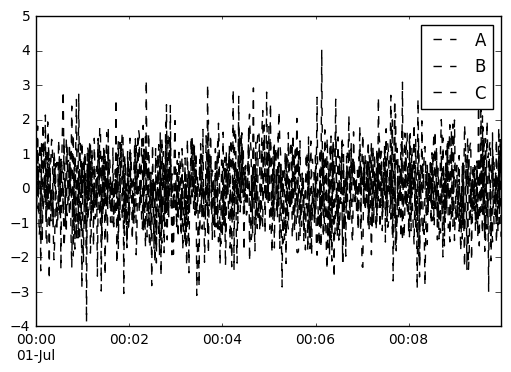

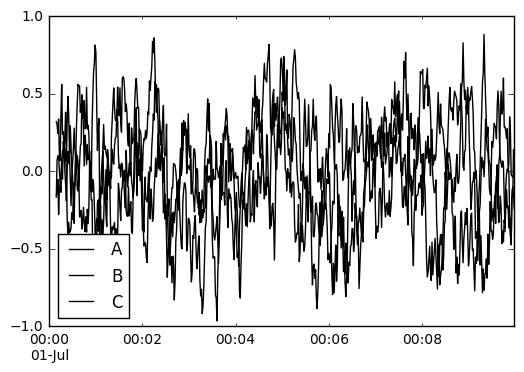

In [3]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [4]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\sudhanshu\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,ignore_na=False,min_periods=2,adjust=True).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,0.546632,-0.630723,-0.520133
2016-07-01 00:00:02,0.794055,-0.147794,0.363408
2016-07-01 00:00:03,0.790445,-0.124233,0.060167
2016-07-01 00:00:04,0.238964,0.020511,-0.140876
2016-07-01 00:00:05,-0.067810,0.314186,-0.295523
2016-07-01 00:00:06,-0.152588,-0.242370,-0.209430
2016-07-01 00:00:07,-0.013733,0.050985,-0.147962
2016-07-01 00:00:08,0.092690,-0.234753,-0.072222
2016-07-01 00:00:09,0.398923,-0.203566,-0.169681


In [5]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [6]:
df.head()

,A,B,C,D
2016-06-06,-0.581196,-0.967516,0.020395,0.173881
2016-06-07,-0.231955,-0.638091,-0.173924,-0.073514
2016-06-08,0.650815,0.241889,1.077055,1.796470
2016-06-09,-0.180017,0.400170,-2.209016,0.063985
2016-06-10,-0.765427,0.920519,1.191842,-0.796512


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000A969B929E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000A9687164A8>], dtype=object)

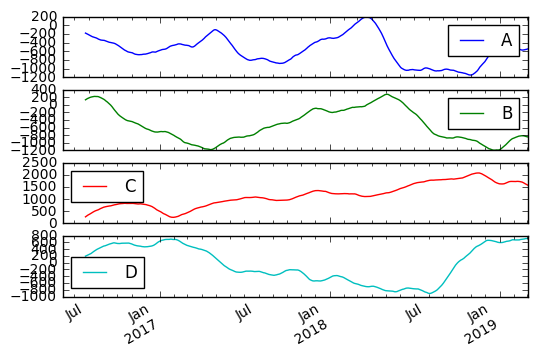

In [7]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [8]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.623544,0.700930,0.514741,0.828038


In [9]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.697174,-1.286561,-0.066567,0.137124
2016-06-08,-0.518894,-1.312280,0.263464,0.723695
2016-06-09,-0.474759,-1.225097,-0.123775,1.032977
2016-06-10,-0.601363,-0.988683,-0.117749,1.059244


In [ ]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [ ]:
# EWMA
# Why use EWMA?

In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting